# **SMA EXPERIMENT NO - 4**

### **Yash Ashok Shirsath BE AI & DS - 40 / B2**

In [1]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import re

try:
    df = pd.read_csv('/content/cleaned_reddit_comments.csv')
except FileNotFoundError:
    print("Cleaned data file not found.")
    exit()

In [3]:
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()
        return text
    return ""  # Or another appropriate handling

df['Comment'] = df['Comment'].apply(preprocess_text)

In [4]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Comment'].apply(get_sentiment)

<ipython-input-5-0a144f8403e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


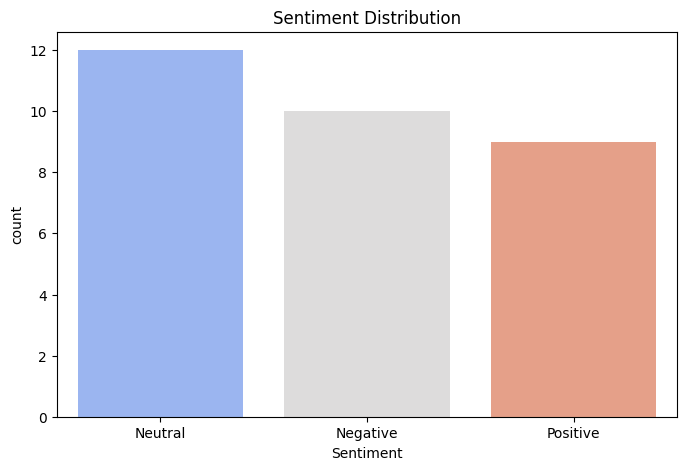

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

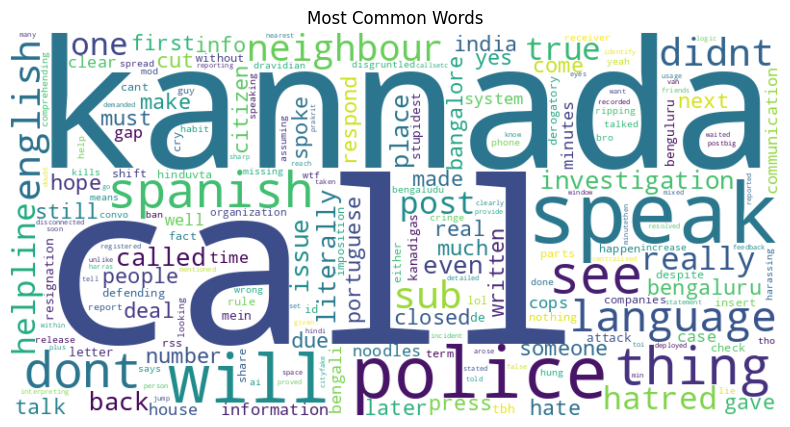

In [6]:
text = ' '.join(df['Comment'])  # Corrected join operation
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()

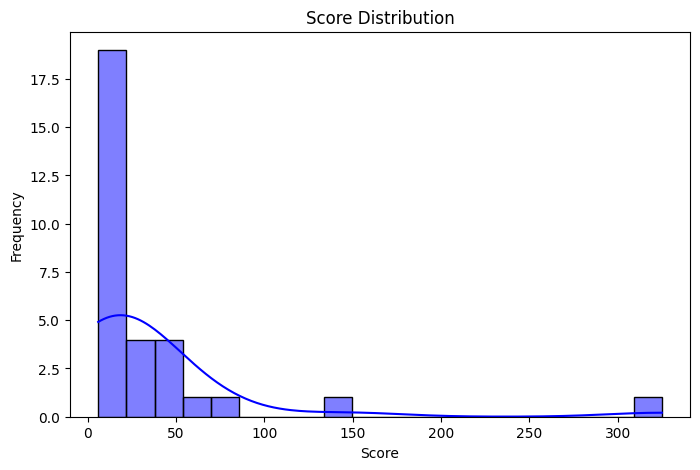

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], bins=20, kde=True, color='blue')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-8-8288549e7be1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors['Comment Author'], x=top_authors['Score'], palette='viridis') # Corrected y-axis label


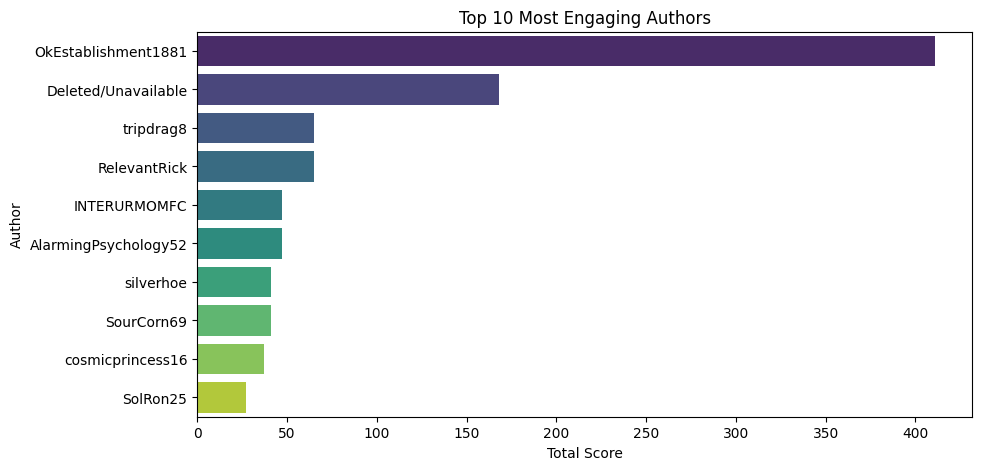

In [8]:
top_authors = df.groupby('Comment Author')['Score'].sum().reset_index().sort_values(by='Score', ascending=False).head(10) # Corrected groupby column
plt.figure(figsize=(10, 5))
sns.barplot(y=top_authors['Comment Author'], x=top_authors['Score'], palette='viridis') # Corrected y-axis label
plt.title('Top 10 Most Engaging Authors')
plt.xlabel('Total Score')
plt.ylabel('Author')
plt.show()

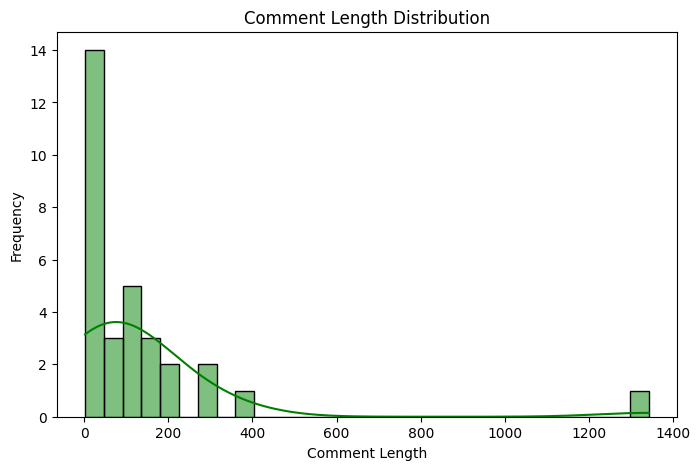

EDA and Visualization Completed! 🚀


In [9]:
df['Comment Length'] = df['Comment'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df['Comment Length'], bins=30, kde=True, color='green')
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

print("EDA and Visualization Completed! 🚀")